## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/archana/Documents/Santander-RecSys/santander-product-recommendation/train_ver2.csv")

/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_2045/1612341302.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/archana/Documents/Santander-RecSys/santander-product-recommendation/train_ver2.csv")


In [3]:
df.shape

(13647309, 48)

In [4]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
df.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

### Removing null values

In [6]:
df.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

Checking percentage of null

In [7]:
total_rows = len(df)
n_missing = df.isnull().sum()

# calculating percentage missing
pct_missing = (n_missing / total_rows) * 100
pct_missing = pct_missing.sort_values(ascending=False)
pct_missing_df = pct_missing.rename("percent_missing").to_frame()
pct_missing_df["n_missing"] = n_missing

print(pct_missing_df)


                       percent_missing  n_missing
conyuemp                     99.986752   13645501
ult_fec_cli_1t               99.818330   13622516
renta                        20.475648    2794375
segmento                      1.387585     189368
canal_entrada                 1.363829     186126
indrel_1mes                   1.097513     149781
tiprel_1mes                   1.097513     149781
nomprov                       0.685784      93591
cod_prov                      0.685784      93591
sexo                          0.203732      27804
tipodom                       0.203227      27735
indfall                       0.203220      27734
indext                        0.203220      27734
ind_actividad_cliente         0.203220      27734
indresi                       0.203220      27734
indrel                        0.203220      27734
ind_nuevo                     0.203220      27734
fecha_alta                    0.203220      27734
pais_residencia               0.203220      27734


Since conyuemp and ult_fec_cli_1t fields have high missing percent, dropping both fields

In [8]:
df = df.drop(["conyuemp","ult_fec_cli_1t"], axis = 1)

In [9]:
df.shape

(13647309, 46)

In [10]:
total_rows = len(df)
n_missing = df.isnull().sum()
pct_missing = (n_missing / total_rows) * 100
pct_missing = pct_missing.sort_values(ascending=False)

# dropping columns with no missing
pct_missing_df = (
    pd.DataFrame({
        'percent_missing': pct_missing,
        'n_missing': n_missing
    })
    .query('n_missing > 0')              
    .sort_values(by='percent_missing', ascending=False)
    .assign(percent_missing=lambda d: d['percent_missing'].round(2))
)

print(pct_missing_df)

                       percent_missing  n_missing
renta                            20.48    2794375
segmento                          1.39     189368
canal_entrada                     1.36     186126
indrel_1mes                       1.10     149781
tiprel_1mes                       1.10     149781
cod_prov                          0.69      93591
nomprov                           0.69      93591
sexo                              0.20      27804
tipodom                           0.20      27735
ind_nuevo                         0.20      27734
indext                            0.20      27734
indfall                           0.20      27734
ind_empleado                      0.20      27734
indresi                           0.20      27734
pais_residencia                   0.20      27734
ind_actividad_cliente             0.20      27734
fecha_alta                        0.20      27734
indrel                            0.20      27734
ind_nom_pens_ult1                 0.12      16063


#### Imputation of Segmento-segmentation
01 - VIP, 02 - Individuals 03 - college graduated

Since it is categorical field, filling missing values with mode

In [11]:
df['segmento'] = df['segmento'].fillna(df['segmento'].mode()[0])
df['segmento'].isnull().sum()

np.int64(0)

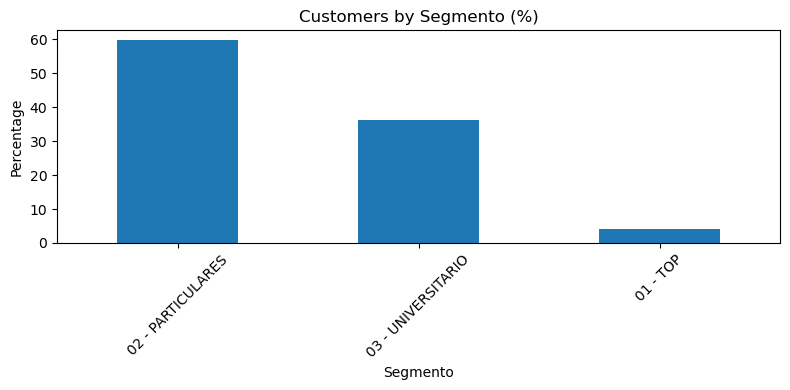

In [12]:
plt.figure(figsize=(8,4))
(df['segmento'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Customers by Segmento (%)')
plt.xlabel('Segmento')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Imputation of Age

In [13]:
# converting it to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
print("dtype of 'age':", df['age'].dtype)


null_count = df['age'].isna().sum()
print("Number of nulls in 'age':", null_count)

pct_null = null_count / len(df) * 100
print(f"Percentage missing in 'age': {pct_null:.2f}%")


dtype of 'age': float64
Number of nulls in 'age': 27734
Percentage missing in 'age': 0.20%


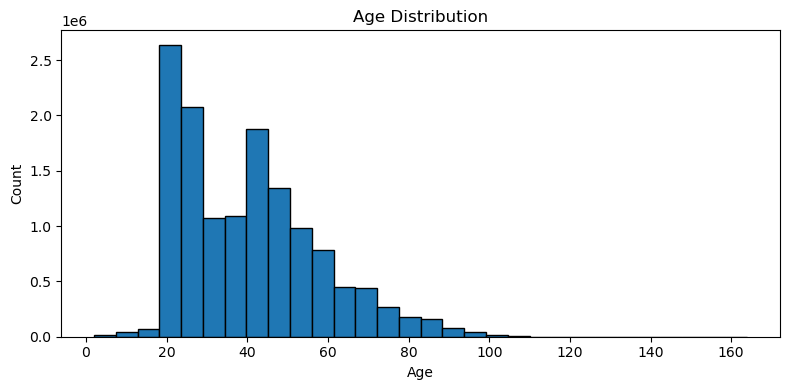

In [14]:
plt.figure(figsize=(8,4))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

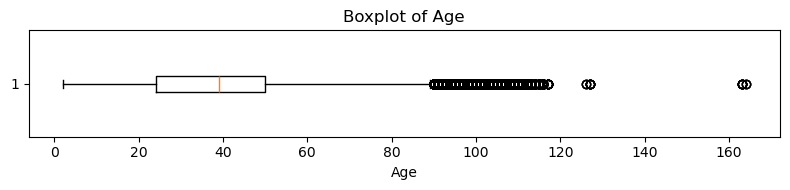

In [15]:
# Boxplot to visualize outliers
ages = df.loc[df['age'].notna(), 'age']
plt.figure(figsize=(8,2))
plt.boxplot(ages, vert=False, showfliers=True)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [16]:
age_min = df['age'].min()
age_max = df['age'].max()

print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")


Minimum age: 2.0
Maximum age: 164.0


Setting min and max age to remove outliers

In [17]:
original_count = len(df)

min_age, max_age = 18, 100
mask = df['age'].between(min_age, max_age) | df['age'].isna()

df = df[mask].copy()

removed_count = original_count - len(df)
removed_pct = removed_count / original_count * 100
print(f"Removed {removed_count} rows ({removed_pct:.2f}%) outside age [{min_age}, {max_age}] (excluding NaNs).")


Removed 131665 rows (0.96%) outside age [18, 100] (excluding NaNs).


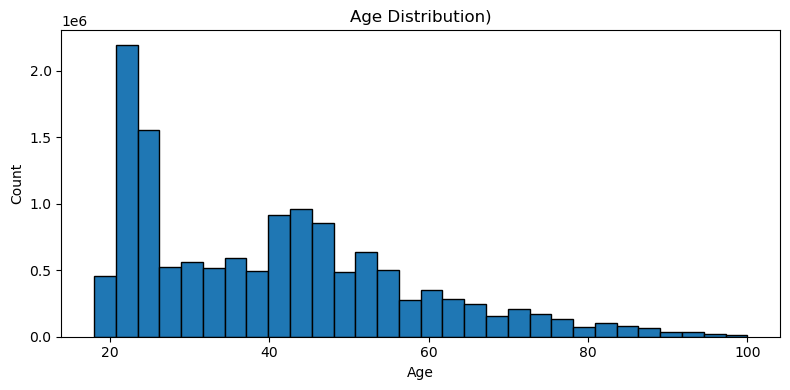

In [18]:
# histogram without outliers
plt.figure(figsize=(8,4))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


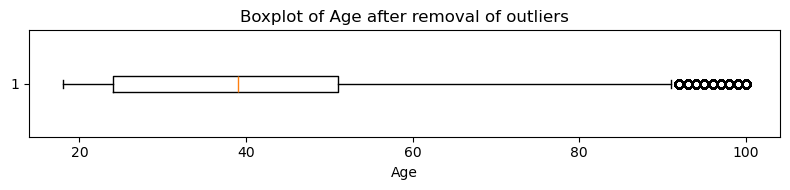

In [19]:
ages = df.loc[df['age'].notna(), 'age']
plt.figure(figsize=(8,2))
plt.boxplot(ages, vert=False, showfliers=True)
plt.title('Boxplot of Age after removal of outliers')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [20]:
age_min = df['age'].min()
age_max = df['age'].max()

print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")


Minimum age: 18.0
Maximum age: 100.0


In [21]:
null_count = df['age'].isna().sum()
print("Number of nulls in 'age':", null_count)

pct_null = null_count / len(df) * 100
print(f"Percentage missing in 'age': {pct_null:.2f}%")

Number of nulls in 'age': 27734
Percentage missing in 'age': 0.21%


Age field is filled with median values of particular segment

In [22]:
# Calculating median age by segmento
df['age_med_by_seg'] = df.groupby('segmento')['age'].transform('median')

# fallback if segment is not present (worst case)
global_age_med = df['age'].median()

# Filling missing values first with segment median, then global median
df['age'] = (df['age'].fillna(df['age_med_by_seg']).fillna(global_age_med))

df.drop(columns=['age_med_by_seg'], inplace=True)


In [23]:
null_count = df['age'].isna().sum()
print("Number of nulls in 'age':", null_count)

pct_null = null_count / len(df) * 100
print(f"Percentage missing in 'age': {pct_null:.2f}%")

Number of nulls in 'age': 0
Percentage missing in 'age': 0.00%


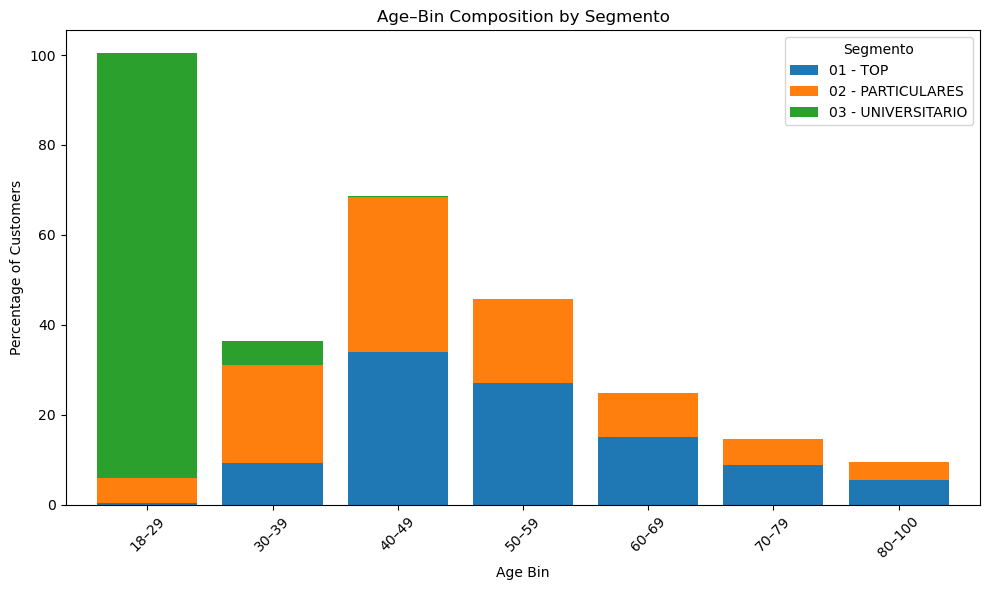

In [24]:
# creating Bin age
bins   = [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18–29','30–39','40–49','50–59','60–69','70–79','80–100']
df['age_bin'] = pd.cut(df['age'],bins=bins,labels=labels,right=True,include_lowest=True)

ct = pd.crosstab(df['age_bin'], df['segmento'], normalize='columns') * 100

colors = plt.get_cmap('tab10').colors[:len(ct.columns)]

ax = ct.plot(
    kind='bar', 
    stacked=True, 
    color=colors, 
    figsize=(10,6), 
    width=0.8
)
ax.set_title('Age–Bin Composition by Segmento')
ax.set_xlabel('Age Bin')
ax.set_ylabel('Percentage of Customers')
ax.legend(title='Segmento', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Imputation of Sexo-Customer's sex

"H" = Hombre (Male)  
"V" = Mujer (Female)

In [25]:
counts = (df.groupby(['segmento','sexo'])['sexo'].count().unstack(fill_value=0))
counts

sexo,H,V
segmento,,
01 - TOP,202351,359533
02 - PARTICULARES,3146652,4843742
03 - UNIVERSITARIO,2780205,2155374


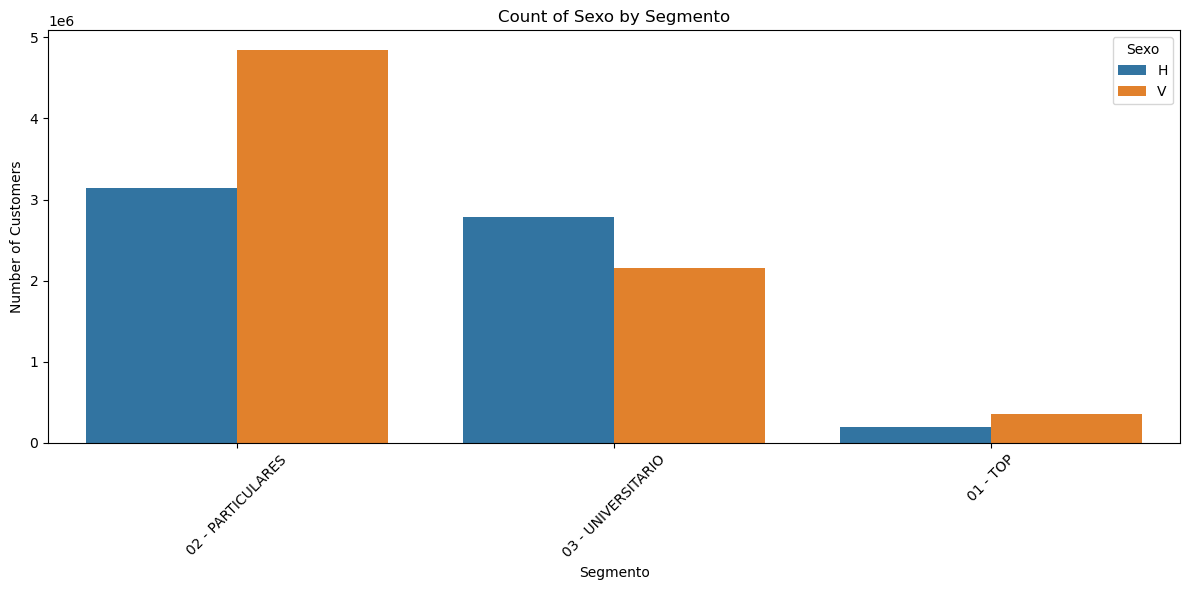

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='segmento', hue='sexo')
plt.title('Count of Sexo by Segmento')
plt.ylabel('Number of Customers')
plt.xlabel('Segmento')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


In [27]:
null_count = df['sexo'].isna().sum()
print("Number of nulls in 'sexo':", null_count)

pct_null = null_count / len(df) * 100
print(f"Percentage missing in 'sexo': {pct_null:.2f}%")

Number of nulls in 'sexo': 27787
Percentage missing in 'sexo': 0.21%


Filling sexo values with segment's mode

In [28]:
counts = df.groupby(['segmento','sexo']).size().unstack(fill_value=0)
segment_mode = counts.idxmax(axis=1)

df['sexo'] = df['sexo'].fillna(df['segmento'].map(segment_mode))

#### Imputation of Renta-Gross income of the household

In [30]:
# groupby using different columns
df['r_med_seg_age'] = df.groupby(['segmento','age_bin'])['renta'].transform('median')
df['r_med_seg']     = df.groupby('segmento')['renta'].transform('median')
df['r_med_age']     = df.groupby('age_bin')['renta'].transform('median')

# Filling missing renta in order: (segmento, age_bin) median, segmento median, age_bin median  
df['renta'] = (
    df['renta']
      .fillna(df['r_med_seg_age'])
      .fillna(df['r_med_seg'])
      .fillna(df['r_med_age'])
)

df.drop(columns=['r_med_seg_age','r_med_seg','r_med_age'], inplace=True)

/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_2045/3924385819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['r_med_seg_age'] = df.groupby(['segmento','age_bin'])['renta'].transform('median')
/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_2045/3924385819.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['r_med_age']     = df.groupby('age_bin')['renta'].transform('median')


In [31]:
null_count = df['renta'].isna().sum()
print("Number of nulls in 'renta':", null_count)

pct_null = null_count / len(df) * 100
print(f"Percentage missing in 'renta': {pct_null:.2f}%")

Number of nulls in 'renta': 0
Percentage missing in 'renta': 0.00%


#### Imputation of Categorical Columns

Mode for other categorical columns

In [32]:
for col in ['canal_entrada','pais_residencia','cod_prov','nomprov']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val).astype('category')

#### Imputation of Flag columns

For the “flag” columns, filling missing value with 0

In [33]:
binary_cols = [
    'ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
    'ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1',
    'ind_viv_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
    'ind_aval_fin_ult1','ind_deco_fin_ult1','ind_ctpp_fin_ult1',
    'ind_ctop_fin_ult1','ind_ctma_fin_ult1','ind_ctju_fin_ult1',
    'ind_cno_fin_ult1','ind_cder_fin_ult1','ind_cco_fin_ult1',
    'ind_ahor_fin_ult1','ind_recibo_ult1',
    'indrel_1mes','tiprel_1mes','indrel',
    'ind_nuevo','indresi','indext',
    'ind_actividad_cliente','ind_empleado',
    'ind_nomina_ult1','ind_nom_pens_ult1','indfall','tipodom'
]

In [34]:
for col in binary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[f'{col}_was_missing'] = df[col].isna().astype(int)
    df[col] = df[col].fillna(0).astype(int)

In [35]:
missing_flags = [col for col in df.columns if col.endswith('_was_missing')]
df.drop(columns=missing_flags, inplace=True)

#### Imputation of fecha_alta - account opening date

Filling date based on median values of segmento and age

In [36]:
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors='coerce')

df['fecha_alta_was_missing'] = df['fecha_alta'].isna().astype(int)

# calculate medians at each level
df['fecha_med_seg_age'] = (
    df.groupby(['segmento','age_bin'])['fecha_alta']
      .transform('median')
)
df['fecha_med_seg'] = (
    df.groupby('segmento')['fecha_alta']
      .transform('median')
)
df['fecha_med_age'] = (
    df.groupby('age_bin')['fecha_alta']
      .transform('median')
)

df['fecha_alta'] = (
    df['fecha_alta']
      .fillna(df['fecha_med_seg_age'])
      .fillna(df['fecha_med_seg'])
      .fillna(df['fecha_med_age'])
)
df.drop(columns=['fecha_med_seg_age','fecha_med_seg','fecha_med_age','fecha_alta_was_missing'], inplace=True)

/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_2045/3050587856.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['segmento','age_bin'])['fecha_alta']
/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_2045/3050587856.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin')['fecha_alta']


In [37]:
df.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

### Basket creation for products

Creating a list of products owned by customers as separate field  
Dropping all the other flag columns  
It would be useful for collaborative filtering 

In [38]:
prod_flags = [
    'ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
    'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
    'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
    'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
    'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
    'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
    'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
    'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1'
]

prod_names = {
    'ind_ahor_fin_ult1': 'Saving Account',
    'ind_aval_fin_ult1': 'Guarantees',
    'ind_cco_fin_ult1': 'Current Accounts',
    'ind_cder_fin_ult1': 'Derivada Account',
    'ind_cno_fin_ult1': 'Payroll Account',
    'ind_ctju_fin_ult1': 'Junior Account',
    'ind_ctma_fin_ult1': 'Más particular Account',
    'ind_ctop_fin_ult1': 'Particular Account',
    'ind_ctpp_fin_ult1': 'Particular Plus Account',
    'ind_deco_fin_ult1': 'Short-term Deposits',
    'ind_deme_fin_ult1': 'Medium-term Deposits',
    'ind_dela_fin_ult1': 'Long-term Deposits',
    'ind_ecue_fin_ult1': 'E-account',
    'ind_fond_fin_ult1': 'Funds',
    'ind_hip_fin_ult1': 'Mortgage',
    'ind_plan_fin_ult1': 'Pensions',
    'ind_pres_fin_ult1': 'Loans',
    'ind_reca_fin_ult1': 'Taxes',
    'ind_tjcr_fin_ult1': 'Credit Card',
    'ind_valo_fin_ult1': 'Securities',
    'ind_viv_fin_ult1': 'Home Account',
    'ind_nomina_ult1': 'Payroll',
    'ind_nom_pens_ult1': 'Pensions Account',
    'ind_recibo_ult1': 'Direct Debit'
}

In [39]:
def make_basket(row):
    return [prod_names[c] for c in prod_flags if row[c] == 1]

df['products'] = df[prod_flags].apply(make_basket, axis=1)

df = df[df['products'].map(len) > 0]
df['n_products'] = df['products'].str.len()

#Dropping the original flag columns
df.drop(columns=prod_flags, inplace=True)

print(df[['ncodpers','products','n_products']].head(5))


   ncodpers               products  n_products
0   1375586     [Current Accounts]           1
1   1050611     [Current Accounts]           1
2   1050612     [Current Accounts]           1
3   1050613  [Short-term Deposits]           1
4   1050614     [Current Accounts]           1


In [40]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,age_bin,products,n_products
0,2015-01-28,1375586,0,ES,H,35.0,2015-01-12,0,6,1,...,0,1,29.0,MALAGA,1,87218.10,02 - PARTICULARES,30–39,[Current Accounts],1
1,2015-01-28,1050611,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,18–29,[Current Accounts],1
2,2015-01-28,1050612,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,18–29,[Current Accounts],1
3,2015-01-28,1050613,0,ES,H,22.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,18–29,[Short-term Deposits],1
4,2015-01-28,1050614,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,1,88474.38,03 - UNIVERSITARIO,18–29,[Current Accounts],1


In [41]:
df.to_csv('/Users/archana/Documents/Santander-RecSys/santander-product-recommendation/cleaned_train_data.csv', index=False)